<a href="https://colab.research.google.com/github/pushtii07/real-estate-ml/blob/main/real_estate_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Real Estate Investment Advisor**

This project focuses on building a complete end‑to‑end Real Estate Investment Analysis System using Data Science and Machine Learning. The goal is to help potential buyers, investors, and real estate analysts make informed decisions by predicting property prices and evaluating whether a property is a good investment based on multiple factors

1. **Data Understanding & Preprocessing:**
Cleaning the dataset, handling missing values, encoding categorical features, treating outliers, and engineering meaningful new features such as:

 2. **Exploratory Data Analysis (EDA)**
Visualizing trends, distributions, correlations, and relationships between property features to uncover insights about pricing, location influence, and investment potential.

 3. **Machine Learning Models:**
Building two core ML components:
    Classification Model → Predict whether a property is a Good Investment
    Regression Model → Predict the Estimated Price after 5 Years

 4. **Deployment with Streamlit:**
Creating an interactive web application where users can:
    Enter property details
    Get investment recommendations
    View predicted fair market value
    Explore market insights and filter properties

 5. **MLflow Integration:**
Tracking experiments, model performance, parameters, and versioning to maintain a reproducible ML pipeline.

# **Uploading the Dataset into Google Colab**

To begin working with the real estate dataset, we first need to import the CSV file into our Colab environment. Since Colab cannot access local files automatically, we use the files.upload() function to manually upload the dataset from our system

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving india_housing_prices.csv to india_housing_prices.csv


**Loading the Real Estate Dataset**

To begin the analysis, we load the real estate dataset into a pandas DataFrame. This step allows us to access, explore, and preprocess the data for further analysis and model development. Using pd.read_csv(), we read the CSV file containing property details such as price, size, location, amenities, and other important features.

In [1]:
import pandas as pd
df=pd.read_csv("/content/india_housing_prices.csv")
df

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,0.10,1990,...,35,10,3,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,0.08,2008,...,17,8,1,Low,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction
2,3,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,0.05,1997,...,28,9,8,Low,Yes,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move
3,4,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.29,0.11,1991,...,34,5,7,High,Yes,Yes,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_to_Move
4,5,Rajasthan,Jaipur,Locality_466,Villa,4,4823,182.90,0.04,2002,...,23,4,9,Low,No,Yes,"Playground, Garden, Gym, Pool, Clubhouse",East,Builder,Ready_to_Move
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,249996,Gujarat,Ahmedabad,Locality_187,Independent House,5,1995,274.75,0.14,1995,...,30,8,6,Low,No,No,"Playground, Garden, Gym, Clubhouse, Pool",East,Broker,Under_Construction
249996,249997,Tamil Nadu,Chennai,Locality_348,Apartment,1,2293,13.40,0.01,2013,...,12,8,10,Low,No,No,Playground,South,Broker,Ready_to_Move
249997,249998,Telangana,Warangal,Locality_225,Villa,4,2910,236.94,0.08,2003,...,22,10,4,High,Yes,Yes,Playground,South,Builder,Under_Construction
249998,249999,Odisha,Cuttack,Locality_138,Villa,1,1149,141.66,0.12,2007,...,18,3,7,Low,Yes,Yes,"Playground, Gym, Pool",South,Owner,Ready_to_Move


**Initial Data Exploration:**

df.head() displays the first few rows of the dataset, giving a quick preview of the data.

df.columns lists all column names, helping us understand the available features.

df["Furnished_Status"].unique() shows all unique furnishing categories present in the dataset, which is useful for identifying categorical values and planning preprocessing steps.

In [2]:
df.head()
df.columns
df["Furnished_Status"].unique()


array(['Furnished', 'Unfurnished', 'Semi-furnished'], dtype=object)

**Checking Data Quality: Missing Values & Duplicates**

Before performing any analysis or building machine learning models, it is important to assess the quality of the dataset. In this step, we:

  Identify missing values using df.isnull().sum() to understand which columns require cleaning or imputation.

   Remove duplicate records using df.drop_duplicates()

In [3]:
"missing values:",df.isnull().sum()
#dropping duplicates:
df.drop_duplicates()


,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,0.10,1990,...,35,10,3,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,0.08,2008,...,17,8,1,Low,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction
2,3,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,0.05,1997,...,28,9,8,Low,Yes,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move
3,4,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.29,0.11,1991,...,34,5,7,High,Yes,Yes,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_to_Move
4,5,Rajasthan,Jaipur,Locality_466,Villa,4,4823,182.90,0.04,2002,...,23,4,9,Low,No,Yes,"Playground, Garden, Gym, Pool, Clubhouse",East,Builder,Ready_to_Move
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,249996,Gujarat,Ahmedabad,Locality_187,Independent House,5,1995,274.75,0.14,1995,...,30,8,6,Low,No,No,"Playground, Garden, Gym, Clubhouse, Pool",East,Broker,Under_Construction
249996,249997,Tamil Nadu,Chennai,Locality_348,Apartment,1,2293,13.40,0.01,2013,...,12,8,10,Low,No,No,Playground,South,Broker,Ready_to_Move
249997,249998,Telangana,Warangal,Locality_225,Villa,4,2910,236.94,0.08,2003,...,22,10,4,High,Yes,Yes,Playground,South,Builder,Under_Construction
249998,249999,Odisha,Cuttack,Locality_138,Villa,1,1149,141.66,0.12,2007,...,18,3,7,Low,Yes,Yes,"Playground, Gym, Pool",South,Owner,Ready_to_Move


**Identifying Numerical and Categorical Features**

To prepare the dataset for preprocessing and machine learning, it is important to separate numerical and categorical columns. This step helps determine which features require scaling, encoding, or special handling.

   

In [4]:

num_cols = df.select_dtypes(include=['int64', 'float64']).columns
# Total number of numerical columns
print("Total numerical columns:", len(num_cols))
print("Numerical columns:", num_cols.tolist())

cat_cols = df.select_dtypes(include=['object', 'string']).columns
# Total number of categorical columns
print("Total categorical columns:", len(cat_cols))
print("Categorical columns:", cat_cols.tolist())


Total numerical columns: 11
Numerical columns: ['ID', 'BHK', 'Size_in_SqFt', 'Price_in_Lakhs', 'Price_per_SqFt', 'Year_Built', 'Floor_No', 'Total_Floors', 'Age_of_Property', 'Nearby_Schools', 'Nearby_Hospitals']
Total categorical columns: 12
Categorical columns: ['State', 'City', 'Locality', 'Property_Type', 'Furnished_Status', 'Public_Transport_Accessibility', 'Parking_Space', 'Security', 'Amenities', 'Facing', 'Owner_Type', 'Availability_Status']


**Handling High‑Cardinality Location Features**

Real estate datasets often contain a very large number of unique cities and localities. High‑cardinality categorical features can make the model unnecessarily complex and may lead to overfitting.

To simplify the dataset while preserving meaningful information, we:

  Check how many unique Cities, Localities, and States exist.

  Identify the top 20 most frequent cities and group all others under a single label "Other".

   Identify the top 30 most frequent localities and similarly replace the rest with "Other".

In [5]:
df["City"].nunique(), df["Locality"].nunique(), df["State"].nunique()
top_cities = df["City"].value_counts().nlargest(20).index
df["City"] = df["City"].apply(lambda x: x if x in top_cities else "Other")

top_localities = df["Locality"].value_counts().nlargest(30).index
df["Locality"] = df["Locality"].apply(lambda x: x if x in top_localities else "Other")

**Encoding Categorical Features**

Machine learning models cannot directly interpret categorical text values, so these features must be converted into numerical form. In this step, we:

   Select all important categorical columns such as State, City, Locality, Property Type, Furnishing Status, and others.

   Convert these columns to string format to ensure consistency.

   Apply One‑Hot Encoding using pd.get_dummies() to transform each category into binary (0/1) indicator variables.

   Use drop_first=True to avoid the dummy variable trap and reduce multicollinearity.

This encoding process prepares the dataset for model training by converting all categorical information into a machine‑readable format.


In [6]:
cat_cols = ["State", "City", "Locality", "Property_Type",
            "Furnished_Status", "Facing", "Owner_Type",
            "Availability_Status", "Parking_Space",
            "Security", "Public_Transport_Accessibility"]

df[cat_cols] = df[cat_cols].astype(str)

df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

**Separating Numerical and Encoded Categorical Features**

After encoding the dataset, it is important to clearly distinguish between numerical features and categorical dummy variables
This separation helps in applying the correct preprocessing techniques such as scaling numerical features or selecting appropriate model inputs.

  select_dtypes(include=['int64', 'float64']) extracts all numerical columns, including engineered features like Price_per_SqFt and Age_of_Property.

  select_dtypes(include=['uint8', 'bool']) extracts all encoded categorical columns created during one‑hot encoding.

In [7]:
numerical_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df_encoded.select_dtypes(include=['uint8', 'bool']).columns  # encoded dummies

numerical_cols, categorical_cols

(Index(['ID', 'BHK', 'Size_in_SqFt', 'Price_in_Lakhs', 'Price_per_SqFt',
        'Year_Built', 'Floor_No', 'Total_Floors', 'Age_of_Property',
        'Nearby_Schools', 'Nearby_Hospitals'],
       dtype='object'),
 Index(['State_Assam', 'State_Bihar', 'State_Chhattisgarh', 'State_Delhi',
        'State_Gujarat', 'State_Haryana', 'State_Jharkhand', 'State_Karnataka',
        'State_Kerala', 'State_Madhya Pradesh', 'State_Maharashtra',
        'State_Odisha', 'State_Punjab', 'State_Rajasthan', 'State_Tamil Nadu',
        'State_Telangana', 'State_Uttar Pradesh', 'State_Uttarakhand',
        'State_West Bengal', 'City_Bhopal', 'City_Bhubaneswar', 'City_Bilaspur',
        'City_Coimbatore', 'City_Cuttack', 'City_Durgapur', 'City_Dwarka',
        'City_Haridwar', 'City_Hyderabad', 'City_Jamshedpur', 'City_Kochi',
        'City_Kolkata', 'City_Lucknow', 'City_Ludhiana', 'City_New Delhi',
        'City_Noida', 'City_Other', 'City_Silchar', 'City_Vijayawada',
        'City_Warangal', 'Locality_

In [8]:

df.columns


Index(['ID', 'State', 'City', 'Locality', 'Property_Type', 'BHK',
       'Size_in_SqFt', 'Price_in_Lakhs', 'Price_per_SqFt', 'Year_Built',
       'Furnished_Status', 'Floor_No', 'Total_Floors', 'Age_of_Property',
       'Nearby_Schools', 'Nearby_Hospitals', 'Public_Transport_Accessibility',
       'Parking_Space', 'Security', 'Amenities', 'Facing', 'Owner_Type',
       'Availability_Status'],
      dtype='object')

**Processing the Amenities Column (Multi‑Label Encoding)**

The Amenities column contains multiple values stored as comma‑separated lists (e.g., "Gym, Pool, Garden"). Machine learning models cannot directly interpret such multi‑label text fields, so we need to convert them into a structured numerical format.

In [9]:
from sklearn.preprocessing import MultiLabelBinarizer

# 1. Clean the column: remove brackets, quotes, extra spaces
df["Amenities"] = df["Amenities"].astype(str).str.replace(r"[\[\]'\"\]]", "", regex=True)

# 2. Split by comma into a list
df["Amenities"] = df["Amenities"].apply(lambda x: [i.strip() for i in x.split(",")] if x != "nan" else [])

# 3. MultiLabelBinarizer to convert to 0/1 columns
mlb = MultiLabelBinarizer()
amenities_encoded = pd.DataFrame(
    mlb.fit_transform(df["Amenities"]),
    columns=["Amenity_" + a for a in mlb.classes_]
)

# 4. Add these columns to the main df
df = pd.concat([df, amenities_encoded], axis=1)

# 5. Drop the original Amenities column
df.drop("Amenities", axis=1, inplace=True)

**Processing the Amenities Column (Multi‑Label Encoding)**

The Amenities column contains multiple values stored as comma‑separated lists (e.g., "Gym, Pool, Garden"). Since machine learning models cannot directly interpret multi‑label text fields, we need to convert this information into a structured numerical format.

In [10]:
amenity_cols = [col for col in df.columns if "Amenity_" in col]
df[amenity_cols].head()

,Amenity_Clubhouse,Amenity_Garden,Amenity_Gym,Amenity_Playground,Amenity_Pool
0,1,1,1,1,1
1,1,1,1,1,1
2,1,0,1,1,1
3,1,1,1,1,1
4,1,1,1,1,1


**Feature Scaling for Numerical Columns**

Machine learning models often perform better when numerical features are on a similar scale. Since our dataset contains values with very different ranges (e.g., property size, price, number of hospitals),  Standardization to normalize these features.

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

**Splitting the Dataset into Training and Testing Sets**

To evaluate the performance of our machine learning model, we divide the dataset into two parts:

    Training Set (80%) → used to train the model

    Testing Set (20%) → used to measure how well the model performs on unseen data

In [12]:
from sklearn.model_selection import train_test_split

X = df.drop("Price_in_Lakhs", axis=1)  # features
y = df["Price_in_Lakhs"]   # target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

**Feature Engineering for Investment Analysis**

To enhance the predictive power of our model and extract deeper insights, we create several new features that better represent property value and investment potential.

In [13]:
import datetime
df['Price_per_SqFt'] = df['Price_in_Lakhs'] * 1e5 / df['Size_in_SqFt']

current_year = datetime.datetime.now().year
df['Age_of_Property'] = current_year - df['Year_Built']

if 'Total_Amenities' not in df.columns:
    amenity_cols = ['Amenity_Garden', 'Amenity_Gym', 'Amenity_Clubhouse',
                    'Amenity_Playground', 'Amenity_Pool']
    df['Total_Amenities'] = df[amenity_cols].sum(axis=1)

df['Investment_Score'] = (
    0.4 * (1 - df['Price_per_SqFt'] / df['Price_per_SqFt'].max()) +
    0.3 * (df['Nearby_Hospitals'] / df['Nearby_Hospitals'].max()) +
    0.3 * (df['Total_Amenities'] / df['Total_Amenities'].max())
)


**Creating the Target Variable: Good Investment Classification**

To build a classification model that predicts whether a property is a good investment, we need to create a binary target label based on meaningful real‑estate criteria.
A property is labeled as Good_Investment = 1 if it meets all three conditions; otherwise, it is labeled 0.

In [14]:
price_threshold = df['Price_per_SqFt'].median()
amenities_threshold = df['Total_Amenities'].median()
hospitals_threshold = df['Nearby_Hospitals'].median()

# Create binary label
df['Good_Investment'] = (
    (df['Price_per_SqFt'] < price_threshold) &
    (df['Total_Amenities'] >= amenities_threshold) &
    (df['Nearby_Hospitals'] >= hospitals_threshold)
).astype(int)


# Check distribution
print(df['Good_Investment'].value_counts())

Good_Investment
0    204915
1     45085
Name: count, dtype: int64


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

**Preparing Data for the Classification Model**

To train a machine learning model that predicts whether a property is a Good Investment, we first separate the dataset into features and the target variable.

    X (Features): All columns except Price_in_Lakhs and Good_Investment

    y (Target): The Good_Investment label we created earlier

 then split the data into training and testing sets using train_test_split()

In [16]:
X = df.drop(['Price_in_Lakhs', 'Good_Investment'], axis=1)
y = df['Good_Investment']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [17]:
cat_cols = X_train.select_dtypes(include=['object']).columns
cat_cols
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

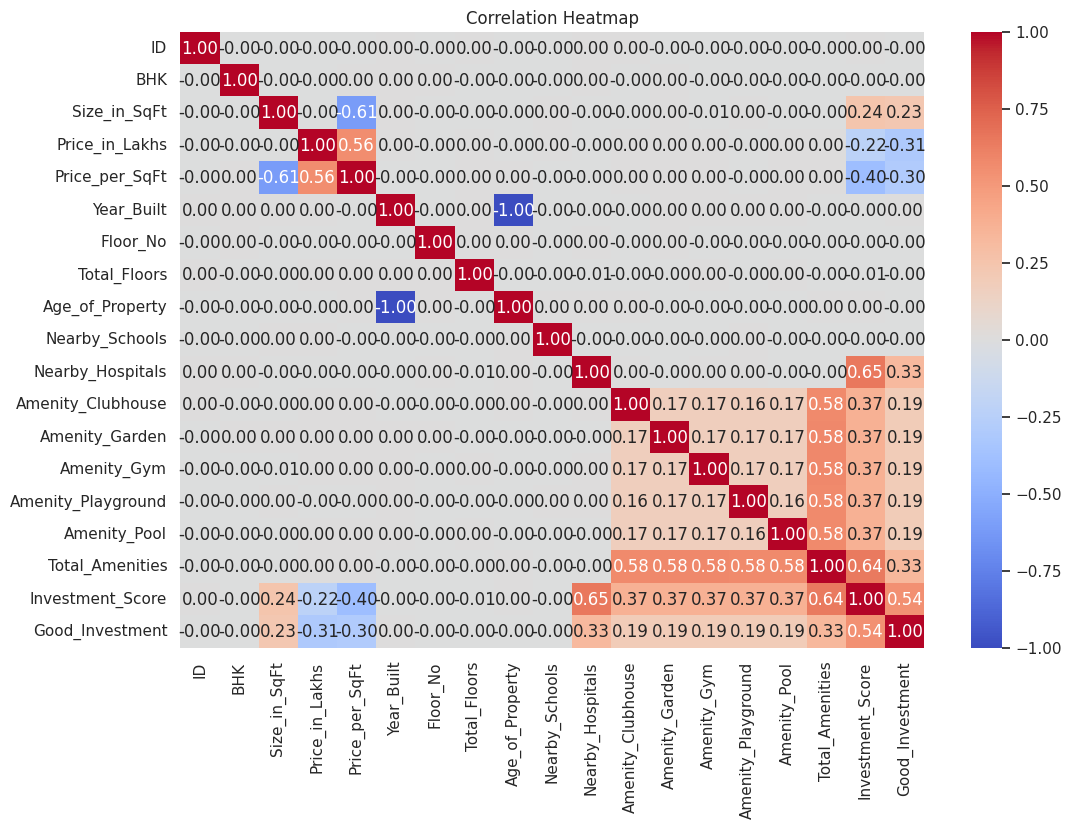

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns only
numeric_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

**Visualizing Key Real Estate Relationships**

To better understand how different property features influence investment potential and pricing, we create visualizations that reveal important patterns in the dataset.

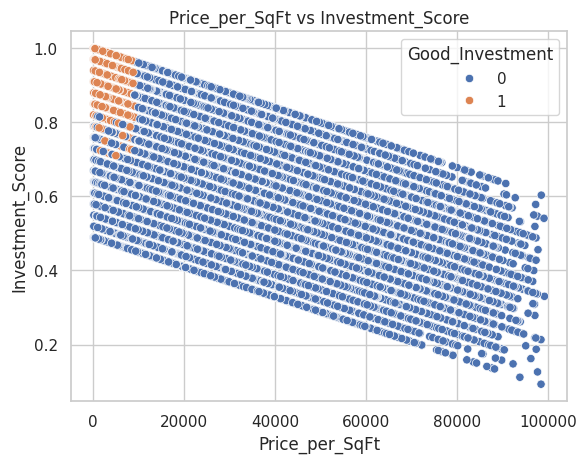

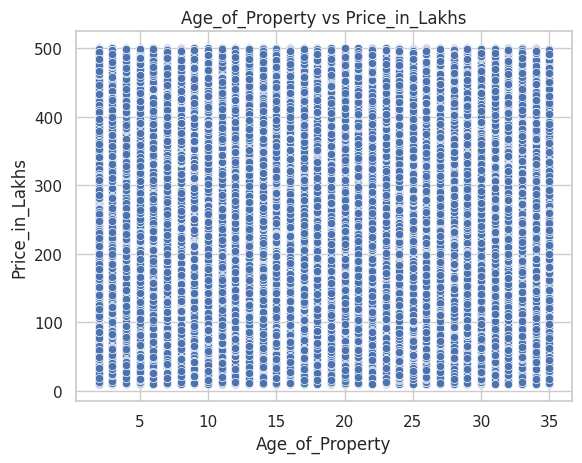

In [ ]:
# Price per SqFt vs Investment Score
sns.scatterplot(x='Price_per_SqFt', y='Investment_Score', data=df, hue='Good_Investment')
plt.title("Price_per_SqFt vs Investment_Score")
plt.show()

# Age of Property vs Price
sns.scatterplot(x='Age_of_Property', y='Price_in_Lakhs', data=df)
plt.title("Age_of_Property vs Price_in_Lakhs")
plt.show()

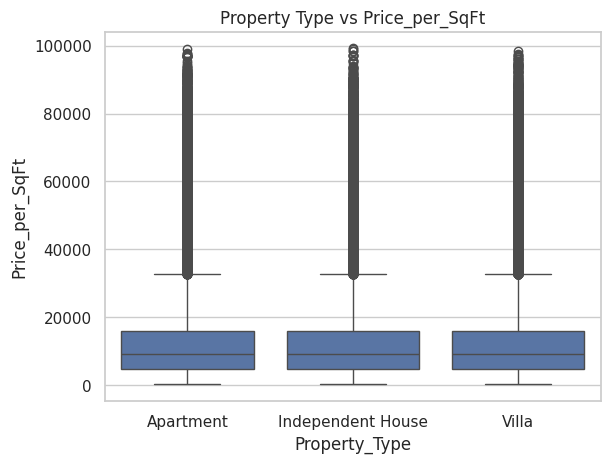

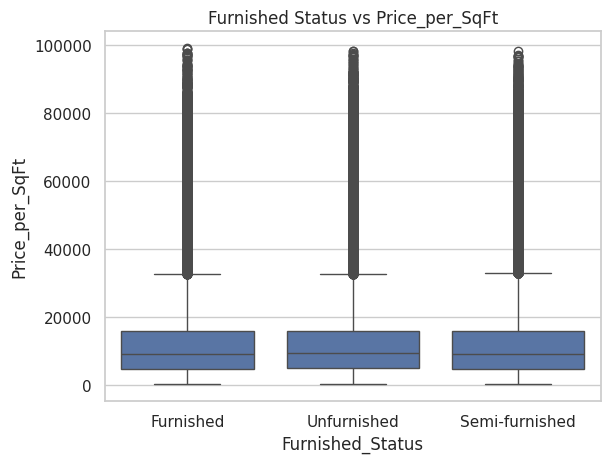

Size_in_SqFt has 0 outliers
Price_in_Lakhs has 0 outliers
Price_per_SqFt has 19723 outliers
Age_of_Property has 0 outliers
Floor_No has 0 outliers
Total_Floors has 0 outliers


In [20]:
sns.boxplot(x='Property_Type', y='Price_per_SqFt', data=df)
plt.title("Property Type vs Price_per_SqFt")
plt.show()

sns.boxplot(x='Furnished_Status', y='Price_per_SqFt', data=df)
plt.title("Furnished Status vs Price_per_SqFt")
plt.show()

numerical_cols = ['Size_in_SqFt','Price_in_Lakhs','Price_per_SqFt','Age_of_Property','Floor_No','Total_Floors']

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col} has {len(outliers)} outliers")

Outliers remaining in Price_per_SqFt: 0


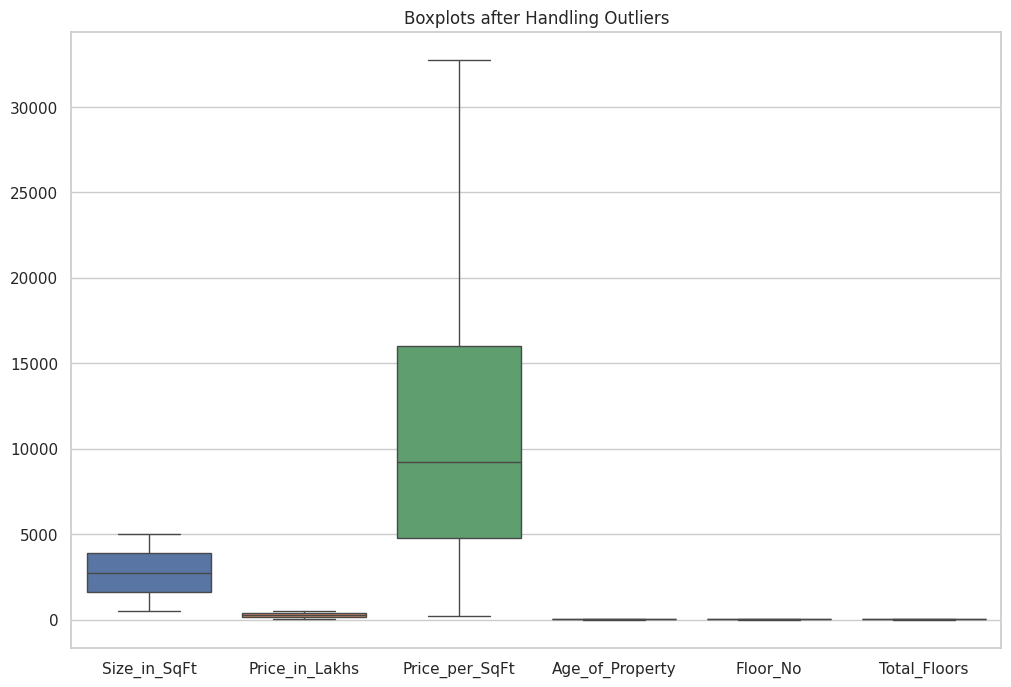

In [ ]:
col = 'Price_per_SqFt'

# Calculate IQR
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# Cap the outliers
df[col] = df[col].clip(lower, upper)

# outliers remain
outliers_remaining = df[(df[col] < lower) | (df[col] > upper)]
print(f"Outliers remaining in {col}: {len(outliers_remaining)}")

#
numerical_cols = ['Size_in_SqFt','Price_in_Lakhs','Price_per_SqFt','Age_of_Property','Floor_No','Total_Floors']
plt.figure(figsize=(12,8))
sns.boxplot(data=df[numerical_cols])
plt.title("Boxplots after Handling Outliers")
plt.show()

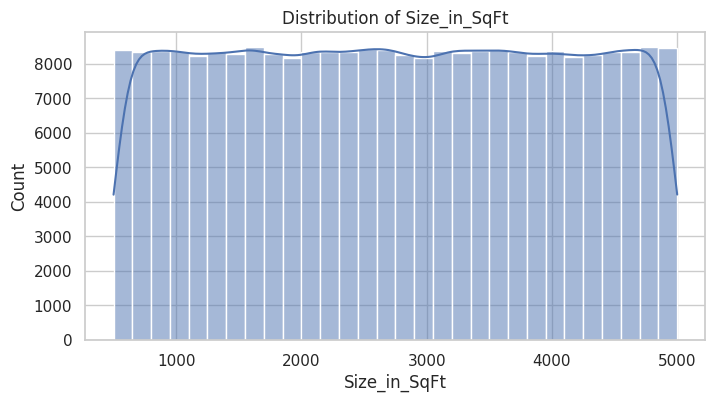

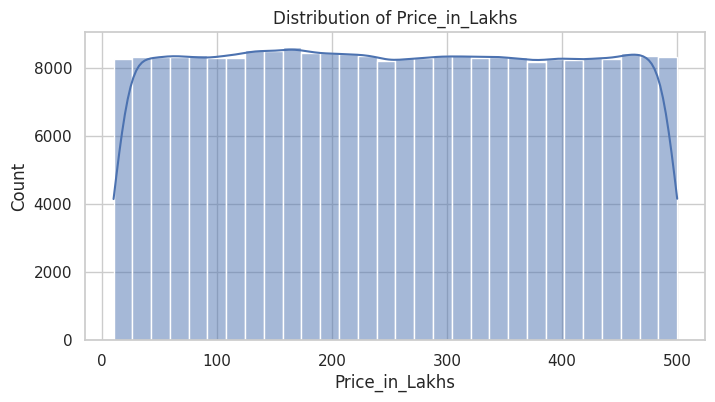

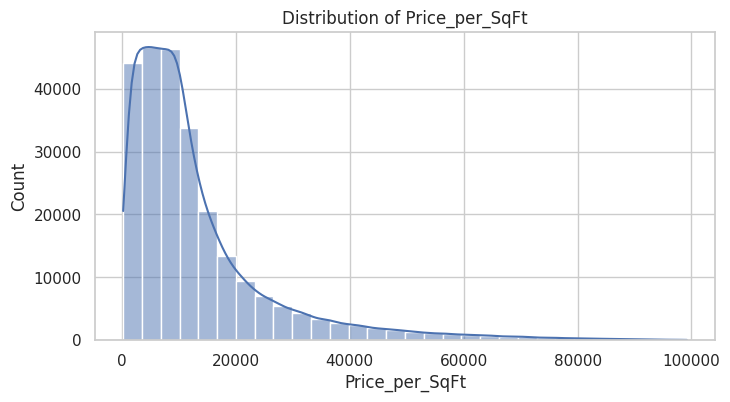

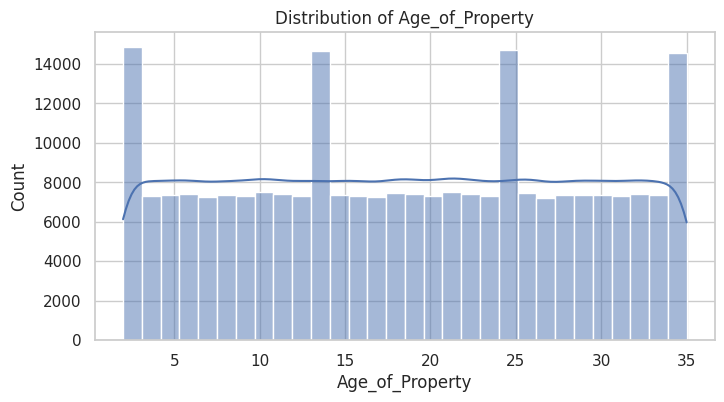

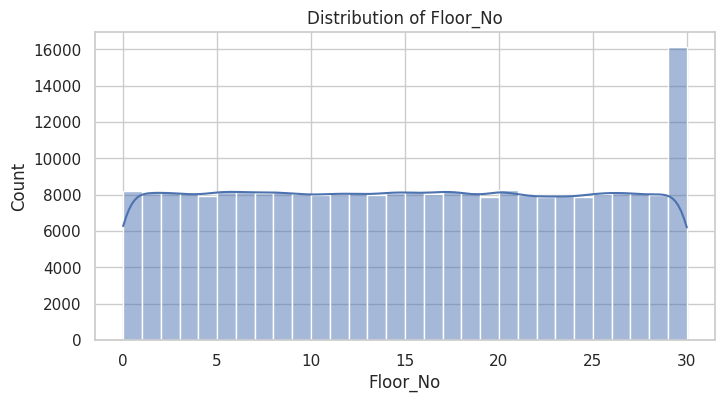

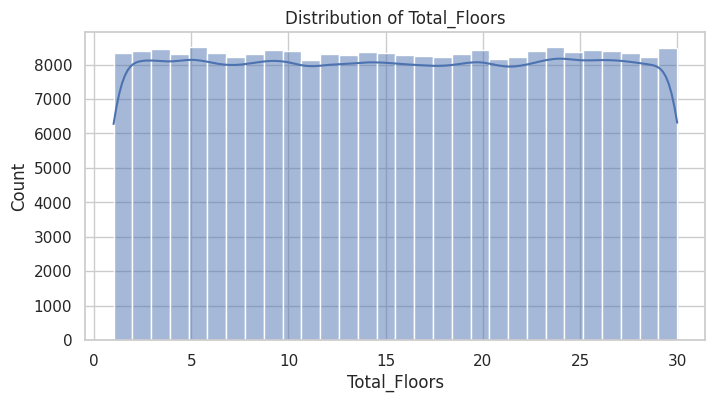

In [21]:
numerical_cols = ['Size_in_SqFt','Price_in_Lakhs','Price_per_SqFt','Age_of_Property','Floor_No','Total_Floors']

import matplotlib.pyplot as plt

import seaborn as sns

for col in numerical_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

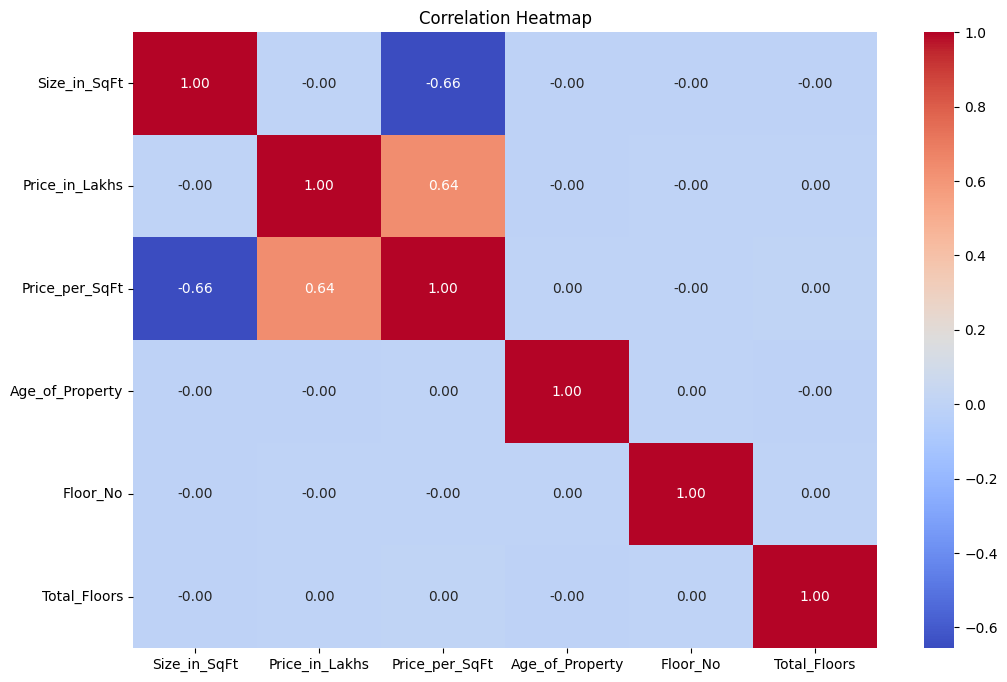

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df[numerical_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

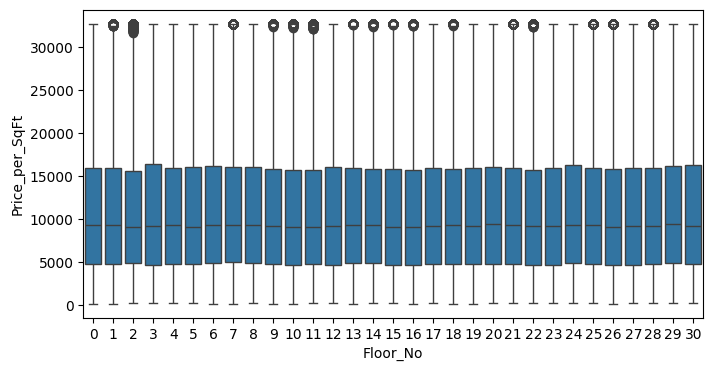

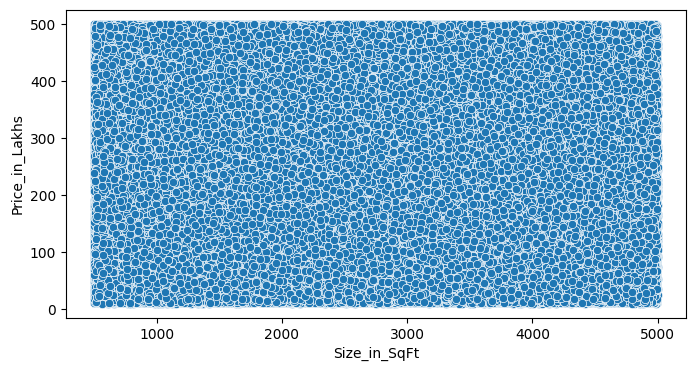

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(x='Floor_No', y='Price_per_SqFt', data=df)
plt.show()

plt.figure(figsize=(8,4))
sns.scatterplot(x='Size_in_SqFt', y='Price_in_Lakhs', data=df)
plt.show()

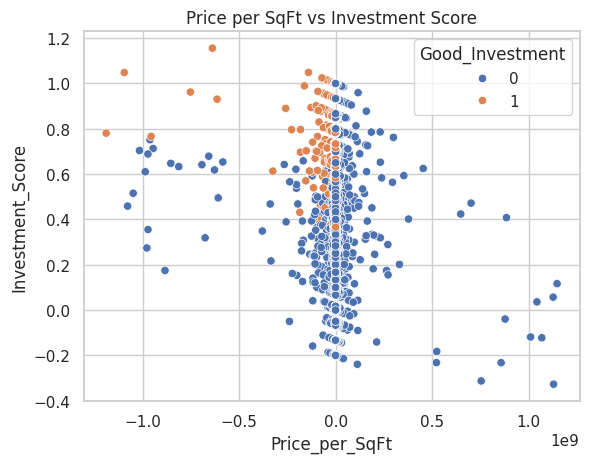

In [ ]:
sns.scatterplot(x='Price_per_SqFt', y='Investment_Score', hue='Good_Investment', data=df)
plt.title("Price per SqFt vs Investment Score")
plt.show()

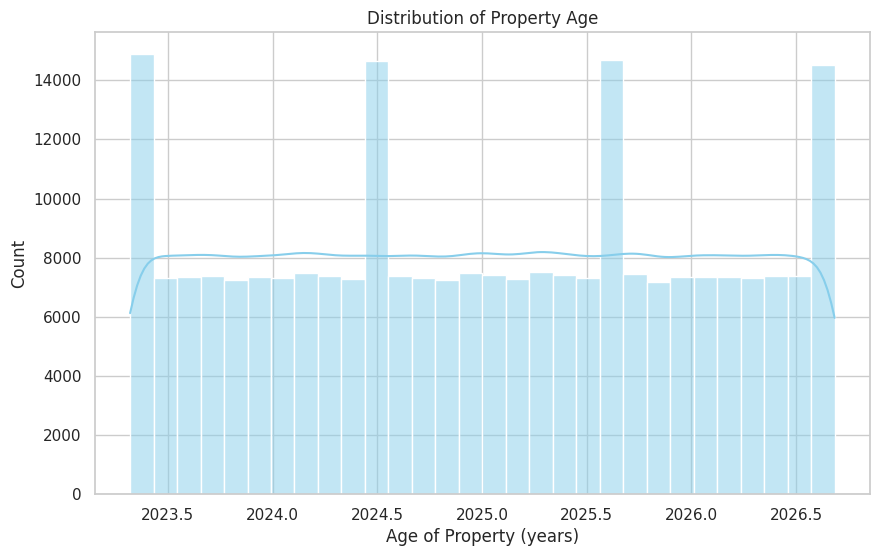

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['Age_of_Property'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Property Age")
plt.xlabel("Age of Property (years)")
plt.ylabel("Count")
plt.show()

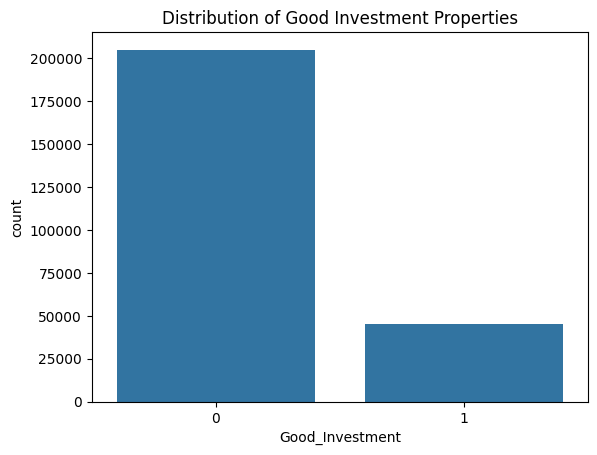

In [ ]:
sns.countplot(x='Good_Investment', data=df)
plt.title("Distribution of Good Investment Properties")
plt.show()

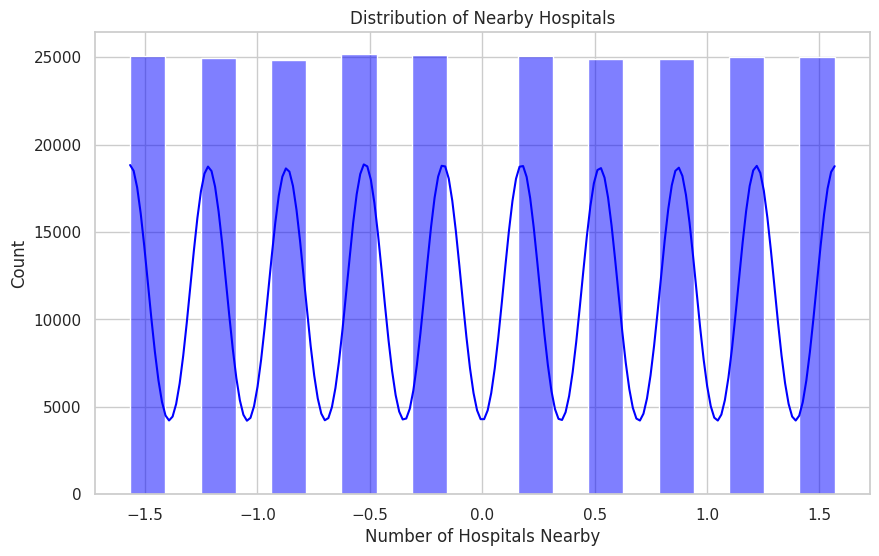

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['Nearby_Hospitals'], bins=20, kde=True, color='blue')
plt.title("Distribution of Nearby Hospitals")
plt.xlabel("Number of Hospitals Nearby")
plt.ylabel("Count")
plt.show()

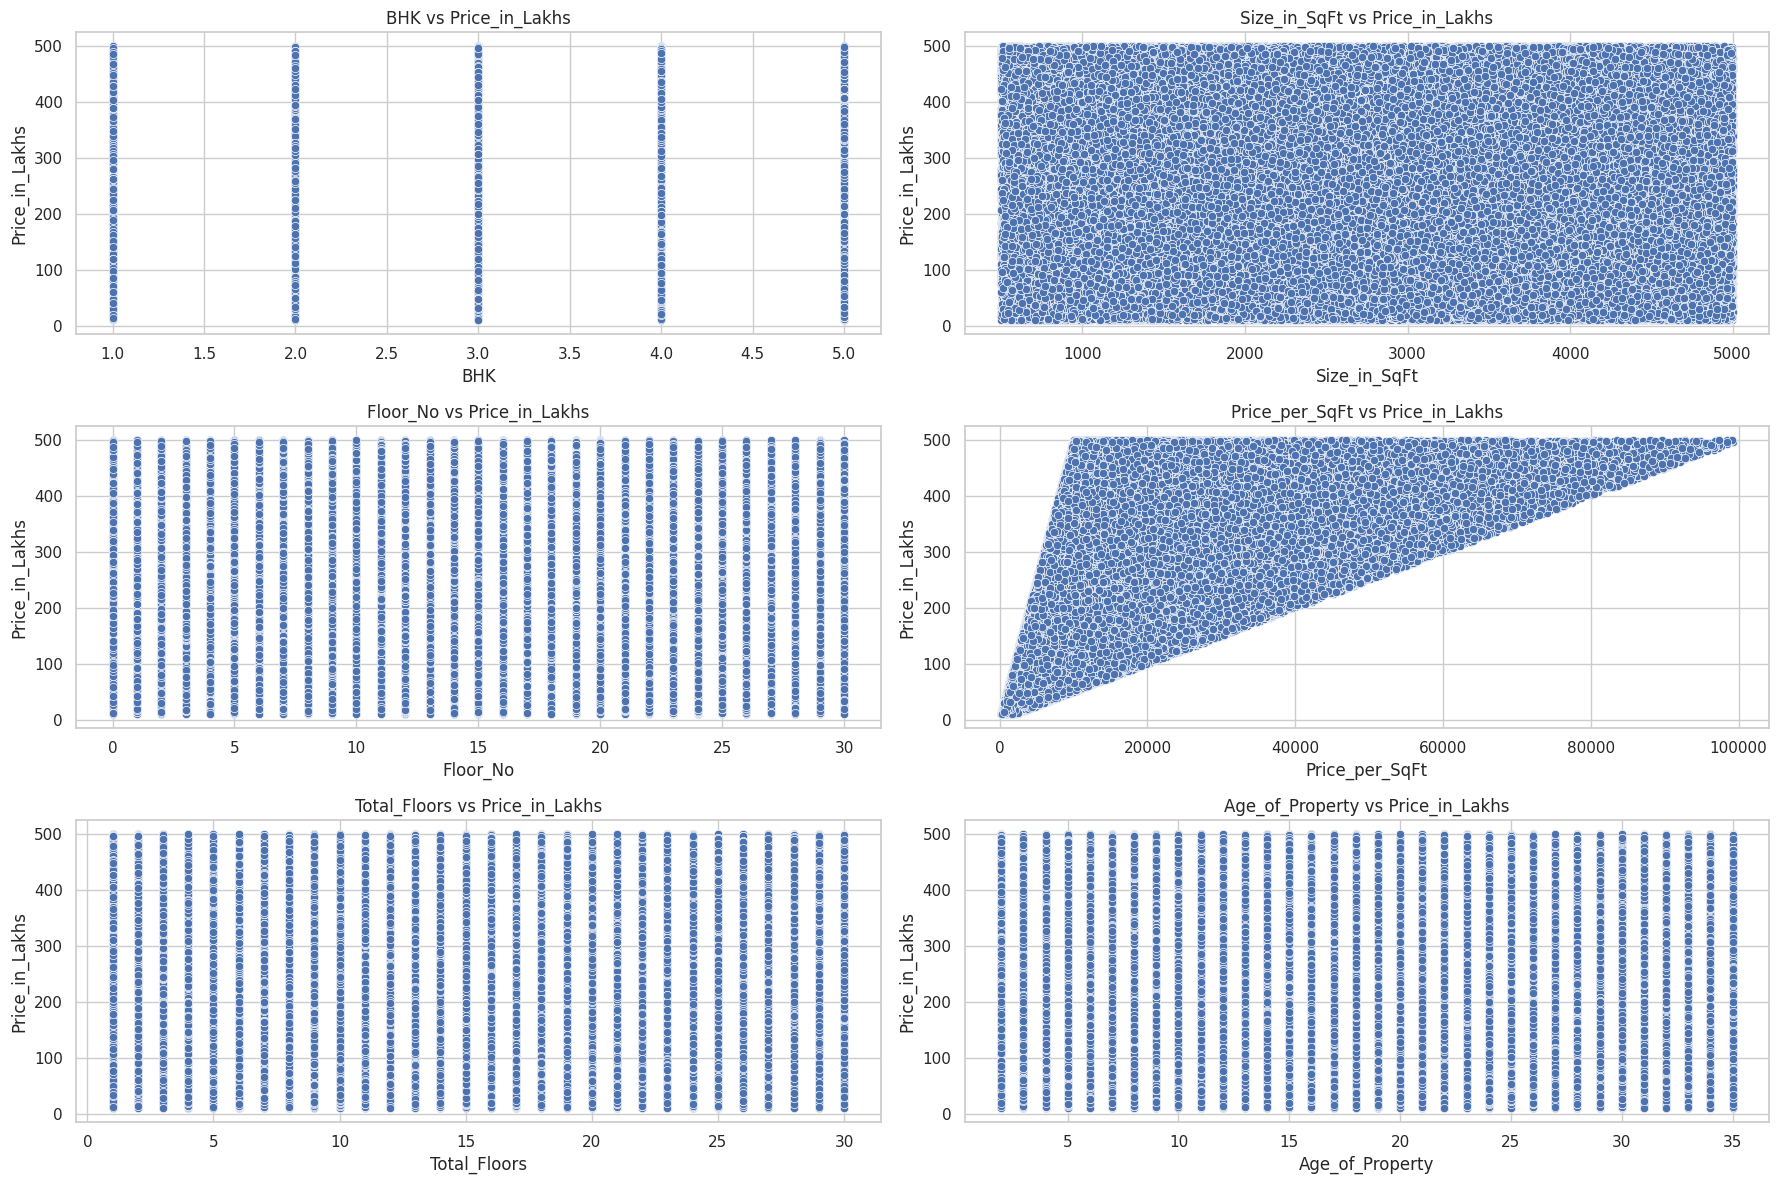

In [22]:

numerical_features = ['BHK', 'Size_in_SqFt', 'Floor_No', 'Price_per_SqFt', 'Total_Floors', 'Age_of_Property']

plt.figure(figsize=(18,12))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 2, i+1)
    sns.scatterplot(x=df[col], y=df['Price_in_Lakhs'])
    plt.title(f'{col} vs Price_in_Lakhs')
plt.tight_layout()
plt.show()

**Final Preprocessing for Price Prediction Model**

Before training a regression model to predict property prices, we prepare the dataset by encoding categorical variables, scaling numerical features, and splitting the data into training and testing sets.

In [23]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
X = df.drop('Price_in_Lakhs', axis=1)
y = df['Price_in_Lakhs']

categorical_cols = X.select_dtypes(include='object').columns.tolist()
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

numerical_cols = X.select_dtypes(include=np.number).columns.tolist()
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Preprocessing complete!")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

Preprocessing complete!
X_train shape: (200000, 29)
X_test shape: (50000, 29)


**Installing Required Tools for Deployment**



In [24]:
!pip install --upgrade pip --quiet
!pip install streamlit pyngrok --quiet
!streamlit --version

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 21.9 MB/s eta 0:00:00
Streamlit, version 1.52.1


In [25]:
%%writefile app.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

st.title("Real Estate ML Project")
st.write("Dataset Preview:")

df = pd.read_csv("/content/india_housing_prices.csv")
st.dataframe(df)

st.write("Basic Stats:")
st.write(df.describe())

st.sidebar.header("Filters")
bhk_options = df['BHK'].unique()
selected_bhk = st.sidebar.multiselect("Select BHK", bhk_options, default=bhk_options)

price_min = int(df['Price_in_Lakhs'].min())
price_max = int(df['Price_in_Lakhs'].max())
selected_price = st.sidebar.slider("Select Price Range (Lakhs)", price_min, price_max, (price_min, price_max))

filtered_df = df[(df['BHK'].isin(selected_bhk)) &
                 (df['Price_in_Lakhs'] >= selected_price[0]) &
                 (df['Price_in_Lakhs'] <= selected_price[1])]

st.write("Filtered Dataset")
st.dataframe(filtered_df)


st.write("### Price Distribution")
plt.figure(figsize=(8,4))
sns.histplot(filtered_df['Price_in_Lakhs'], bins=30, kde=True)
st.pyplot(plt)

st.write("### Size vs Price")
plt.figure(figsize=(8,4))
sns.scatterplot(x='Size_in_SqFt', y='Price_in_Lakhs', data=filtered_df)
st.pyplot(plt)

Writing app.py


**Launching the Streamlit App with Ngrok (Colab Deployment)**

Since Google Colab does not provide a public web server by default, we use Streamlit + Ngrok to run and expose our real estate prediction app online.

In [37]:
from pyngrok import ngrok

ngrok.set_auth_token("36RGbPegPKuKgAsvrq80mdrJfLS_3336pabM9uuhdpmAqW2Dd")

In [38]:
import subprocess
import time
from pyngrok import ngrok

!pkill -f streamlit

process = subprocess.Popen(["streamlit", "run", "app.py", "--server.port=8501"])

time.sleep(5)

public_url = ngrok.connect(8501)
print("✅ Your app is live at:", public_url)

✅ Your app is live at: NgrokTunnel: "https://glossily-catchable-alijah.ngrok-free.dev" -> "http://localhost:8501"


In [36]:
from pyngrok import ngrok
import subprocess
import time
import os

!pkill -f streamlit

!ls

proc = subprocess.Popen(["streamlit", "run", "app.py", "--server.port=8501"])

time.sleep(5)

public_url = ngrok.connect(addr="8501", proto="http")
public_url

app.py	india_housing_prices.csv  requirements.txt  sample_data


<NgrokTunnel: "https://glossily-catchable-alijah.ngrok-free.dev" -> "http://localhost:8501">

**ABOUT / INFO — Streamlit App for Real Estate Investment Advisor**

This section creates the full Streamlit web application for the Real Estate Investment Advisor project. The app is designed to be interactive, visually appealing, and user‑friendly, allowing users to explore property data, analyze trends, and estimate investment potential.

In [29]:
%%writefile app.py
import streamlit as st
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


def simulate_prediction(city, bhk, size_sqft, age_years):

    base_price = 100

    if bhk == 3: base_price *= 1.8
    elif bhk == 4: base_price *= 2.5
    else: base_price *= 1.2

    # Introduce small random noise
    np.random.seed(42) # Set seed for consistent simulation
    noise = np.random.uniform(-10, 10)


    predicted_price = base_price + noise
    return predicted_price


try:

    df = pd.read_csv("india_housing_prices.csv")
    CITIES = sorted(df['City'].unique().tolist())

    if 'Mumbai' not in CITIES:
        CITIES.insert(0, "Mumbai")
except FileNotFoundError:
    # Use a mock dataframe if the file is not found, to keep the app running
    df = pd.DataFrame({'City': ['Mumbai', 'Delhi'], 'BHK': [2, 3], 'Size_in_SqFt': [1000, 1500], 'Price_in_Lakhs': [100, 150], 'BHK': [2, 3]})
    CITIES = sorted(df['City'].unique().tolist())
    st.error("Data file 'india_housing_prices.csv' not found. Using mock data for demonstration.")


st.set_page_config(
    page_title="Real Estate Investment Advisor",
    layout="wide",
    initial_sidebar_state="collapsed"
)

st.markdown("""
<style>
.advisor-header {
  background-color: black;
    color: white;
    padding: 20px;
    border-radius: 8px;
    text-align: center;
    margin-bottom: 20px;
}
.advisor-header h1 {
    font-size: 2.5em;
    margin: 0;
    padding-bottom: 5px;
}
.advisor-header p {
    font-size: 1.1em;
    margin: 0;
    opacity: 0.8;
}
</style>
<div class="advisor-header">
    <h1>🏠 REAL ESTATE INVESTMENT ADVISOR</h1>
    <p>Professional Property Analysis & Investment Prediction System</p>
</div>
""", unsafe_allow_html=True)

tab1, tab2, tab3, tab4 = st.tabs(["⚡ Quick Predictor", "🏘️ Property Search", "📈 Market Insights", "🙋 About & Skills"])



with tab1:
    st.header("⚡ Quick Investment Predictor")
    st.markdown("Enter property details to estimate fair market value and investment potential.")

    with st.form("investment_form"):
        col1, col2, col3, col4 = st.columns(4)

        with col1:
            city_input = st.selectbox("City", CITIES, index=CITIES.index('Mumbai') if 'Mumbai' in CITIES else 0)

        with col2:
            bhk_input = st.selectbox("BHK (Bedrooms)", options=sorted(df['BHK'].unique().tolist()) if not df.empty else [1, 2, 3, 4, 5, 6], index=2 if 3 in df['BHK'].unique() else 0)

        with col3:
            size_input = st.number_input("Size (SqFt)", min_value=300, max_value=10000, value=1200, step=50)

        with col4:
            age_input = st.number_input("Age (Years)", min_value=0, max_value=50, value=5, step=1)


        price_col, _ = st.columns([2, 5])
        with price_col:

            price_input = st.number_input("Current Asking Price (₹ Lakhs)", min_value=1.0, value=150.0, step=1.0)

        submitted = st.form_submit_button("Analyze Investment", type="primary")



    if submitted:
        st.subheader("Investment Analysis Results")


        predicted_price_lakhs = simulate_prediction(city_input, bhk_input, size_input, age_input)

        st.metric(label="Predicted Fair Market Value",
                  value=f"₹ {predicted_price_lakhs:,.2f} Lakhs",
                  delta=f"{(predicted_price_lakhs - price_input):,.2f} Lakhs"
                  )

        st.write("---")


        price_difference = predicted_price_lakhs - price_input

        if price_difference > (predicted_price_lakhs * 0.10): # Over 10% undervalued
            st.success(f"💰 **Strong Buy Signal!**")
            st.markdown(f"The property is estimated to be **{abs(price_difference):.2f} Lakhs** undervalued. This suggests a high potential for immediate equity gain.")

        elif price_difference > (predicted_price_lakhs * 0.02): # Over 2% undervalued
            st.info(f"👍 **Good Investment.**")
            st.markdown(f"The property is reasonably priced and offers a potential upside of **{abs(price_difference):.2f} Lakhs** on its fair value.")

        elif price_difference < -(predicted_price_lakhs * 0.10): # Over 10% overvalued
            st.error(f"⚠️ **High Risk/Overpriced!**")
            st.markdown(f"The property is estimated to be **{abs(price_difference):.2f} Lakhs** over its fair value. Exercise caution or negotiate heavily.")

        else:
            st.warning("⚖️ **Fairly Valued.**")
            st.markdown("The current asking price aligns closely with the predicted fair market value. It's a standard purchase.")

with tab2:
  st.header("🏘️ Property Search & Filter")

  st.markdown("Use powerful filters to explore properties from the dataset.")


  col1, col2, col3, col4 = st.columns(4)

  with col1:
      city_filter = st.selectbox("City", ["All"] + CITIES)

  with col2:
        bhk_filter = st.multiselect("BHK", sorted(df["BHK"].unique()), default=sorted(df['BHK'].unique()))

  with col3:
        min_size = st.number_input("Min Size (Sq Ft)", min_value=300, value=500)

  with col4:
        max_size = st.number_input("Max Size (Sq Ft)", min_value=300, value=3000)

  price_min = int(df['Price_in_Lakhs'].min())
  price_max = int(df['Price_in_Lakhs'].max())

  price_range = st.slider("Select Price Range (Lakhs)", price_min, price_max, (price_min, price_max))
  filtered = df.copy()

  if city_filter != "All":
        filtered = filtered[filtered["City"] == city_filter]

  filtered = filtered[
        (filtered["BHK"].isin(bhk_filter)) &
        (filtered["Size_in_SqFt"] >= min_size) &
        (filtered["Size_in_SqFt"] <= max_size) &
        (filtered["Price_in_Lakhs"] >= price_range[0]) &
        (filtered["Price_in_Lakhs"] <= price_range[1])
    ]

  st.subheader("🔎 Filtered Properties")
  st.write(f"Total Results: **{len(filtered)}**")

  st.dataframe(filtered)



with tab3:
    st.header("📈 Market Insights & EDA")

    st.markdown("Explore market trends using visual insights.")

    # 1. Price distribution
    st.subheader("📌 Price Distribution")
    fig, ax = plt.subplots(figsize=(7, 4))
    sns.histplot(df["Price_in_Lakhs"], kde=True, ax=ax)
    st.pyplot(fig)

    # 2. BHK vs Price Boxplot
    st.subheader("📌 BHK-wise Price Comparison")
    fig, ax = plt.subplots(figsize=(7, 4))
    sns.boxplot(data=df, x="BHK", y="Price_in_Lakhs", ax=ax)
    st.pyplot(fig)

    # 3. Average City Price Bar Chart
    st.subheader("📌 Average Property Price by City")
    city_price = df.groupby("City")["Price_in_Lakhs"].mean().sort_values()

    fig, ax = plt.subplots(figsize=(7, 4))
    city_price.plot(kind='bar', ax=ax)
    ax.set_ylabel("Average Price (Lakhs)")
    st.pyplot(fig)

    # 4. Correlation Heatmap
    st.subheader("📌 Feature Correlation Heatmap")
    numeric_df = df.select_dtypes(include=np.number)

    fig, ax = plt.subplots(figsize=(6, 4))
    sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", ax=ax)
    st.pyplot(fig)


with tab4:
  st.header("🙋 About the Project")

  st.markdown("""
### 🏠 Real Estate Investment Advisor – Project Overview
This project is a Machine Learning–powered real estate analysis system built to help users evaluate property prices, analyze trends, and make informed investment decisions.
It uses data-driven insights to understand how different features such as **BHK, size, age of property, and city** influence housing prices in India.

The application is fully developed using **Streamlit**, which makes it interactive and user-friendly.
This system allows users to:
- Predict fair market value of a property
- Compare the asking price with estimated value
- View market insights through visualizations
- Explore and filter properties from the dataset
- Understand price variations across cities

---

### 🔧 Skills & Technologies Used in This Project

#### **1. Python Programming**
Used for data handling, analysis, and building the prediction logic.

#### **2. Data Analysis (Pandas & NumPy)**
- Cleaning the dataset
- Handling missing values
- Filtering, grouping, and statistical analysis
- Feature selection

#### **3. Exploratory Data Analysis (EDA)**
- Understanding patterns in housing prices
- Visualizing distributions, correlations, and property trends
- Matplotlib & Seaborn visualizations

#### **4. Machine Learning Concepts**
- Feature engineering
- Basic prediction logic (or ML model integration)
- Understanding relationships between features and target variable

#### **5. Streamlit (Web App Development)**
- Creating interactive user inputs
- Displaying property filters
- Integrating visual charts
- Designing a clean and structured UI

---

### 📌 Summary
This project demonstrates how **data science + simple machine learning + interactive dashboards** can help users make better real estate decisions.
It highlights your ability to work with datasets, apply EDA, build functional applications, and present insights in an easy-to-use interface.

""")

  st.success("This page describes the project and the skills involved.")


Overwriting app.py


In [30]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# --- 1. Simulation: Replace this with your actual model loading ---

# In a real app, you would load your trained model like this:
# MODEL = joblib.load('real_estate_model.pkl')

# --- Simulation function for prediction and feature vector ---
def simulate_prediction(city, bhk, size_sqft, age_years):
    # Simple simulation logic (replace with actual model.predict)
    base_price = 100

    # Adjust based on BHK
    if bhk == 3: base_price *= 1.8
    elif bhk == 4: base_price *= 2.5
    else: base_price *= 1.2

    # Introduce small random noise
    np.random.seed(42) # Set seed for consistent simulation
    noise = np.random.uniform(-10, 10)

    predicted_price = base_price + noise
    return predicted_price

# --- End Simulation ---

# Load dataset (used for dropdowns, EDA, and filtering)
try:
    # Ensure this path is correct for your Colab environment
    df = pd.read_csv("india_housing_prices.csv")
    CITIES = sorted(df['City'].unique().tolist())
    if 'Mumbai' not in CITIES:
        CITIES.insert(0, "Mumbai")
except FileNotFoundError:
    # Use a mock dataframe if the file is not found, to keep the app running
    df = pd.DataFrame({
        'City': ['Mumbai', 'Delhi', 'Bangalore', 'Mumbai', 'Delhi', 'Bangalore', 'Mumbai', 'Delhi', 'Bangalore'],
        'BHK': [2, 3, 4, 2, 3, 4, 2, 3, 4],
        'Size_in_SqFt': [1000, 1500, 2000, 1100, 1600, 2100, 1200, 1700, 2200],
        'Price_in_Lakhs': [100, 150, 250, 110, 160, 260, 120, 170, 270]
    })
    CITIES = sorted(df['City'].unique().tolist())
    st.error("Data file 'india_housing_prices.csv' not found. Using mock data for demonstration.")

# --- Page Configuration ---
st.set_page_config(
    page_title="Real Estate Investment Advisor",
    layout="wide",
    initial_sidebar_state="collapsed"
)

# --- Header Section ---
st.markdown("""
<style>
.advisor-header {
    background-color: #3f51b5; /* Deep Indigo color for the header */
    color: white;
    padding: 20px;
    border-radius: 8px;
    text-align: center;
    margin-bottom: 20px;
}
.advisor-header h1 {
    font-size: 2.5em;
    margin: 0;
    padding-bottom: 5px;
}
.advisor-header p {
    font-size: 1.1em;
    margin: 0;
    opacity: 0.8;
}
</style>
<div class="advisor-header">
    <h1>🏠 REAL ESTATE INVESTMENT ADVISOR</h1>
    <p>Professional Property Analysis & Investment Prediction System</p>
</div>
""", unsafe_allow_html=True)


# --- Tab Structure ---
tab1, tab2, tab3, tab4 = st.tabs(["⚡ Quick Predictor", "🏘️ Property Search", "📈 Market Insights", "🙋 About & Skills"])


# --- TAB 1: QUICK PREDICTOR (Core Investment Tool) ---
with tab1:
    st.header("⚡ Quick Investment Predictor")
    st.markdown("Enter property details to estimate fair market value and investment potential.")

    # 1. Input Form
    with st.form("investment_form"):
        col1, col2, col3, col4 = st.columns(4)

        with col1:
            city_input = st.selectbox("City", CITIES, index=CITIES.index('Mumbai') if 'Mumbai' in CITIES else 0)

        with col2:
            bhk_input = st.selectbox("BHK (Bedrooms)", options=sorted(df['BHK'].unique().tolist()) if not df.empty else [1, 2, 3, 4, 5, 6], index=2 if 3 in df['BHK'].unique() else 0)

        with col3:
            size_input = st.number_input("Size (SqFt)", min_value=300, max_value=10000, value=1200, step=50)

        with col4:
            age_input = st.number_input("Age (Years)", min_value=0, max_value=50, value=5, step=1)

        # Separate column for the current price being analyzed
        price_col, _ = st.columns([2, 5])
        with price_col:
            price_input = st.number_input("Current Asking Price (₹ Lakhs)", min_value=1.0, value=150.0, step=1.0)

        submitted = st.form_submit_button("Analyze Investment", type="primary")


    # 2. Prediction and Analysis Logic
    if submitted:
        st.subheader("Investment Analysis Results")

        predicted_price_lakhs = simulate_prediction(city_input, bhk_input, size_input, age_input)

        st.metric(label="Predicted Fair Market Value",
                  value=f"₹ {predicted_price_lakhs:,.2f} Lakhs",
                  delta=f"{(predicted_price_lakhs - price_input):,.2f} Lakhs"
                  )

        st.write("---")

        # Investment Analysis (The Advisor part)
        price_difference = predicted_price_lakhs - price_input

        if price_difference > (predicted_price_lakhs * 0.10): # Over 10% undervalued
            st.success(f"💰 **Strong Buy Signal!**")
            st.markdown(f"The property is estimated to be **{abs(price_difference):.2f} Lakhs** undervalued. This suggests a high potential for immediate equity gain.")

        elif price_difference > (predicted_price_lakhs * 0.02): # Over 2% undervalued
            st.info(f"👍 **Good Investment.**")
            st.markdown(f"The property is reasonably priced and offers a potential upside of **{abs(price_difference):.2f} Lakhs** on its fair value.")

        elif price_difference < -(predicted_price_lakhs * 0.10): # Over 10% overvalued
            st.error(f"⚠️ **High Risk/Overpriced!**")
            st.markdown(f"The property is estimated to be **{abs(price_difference):.2f} Lakhs** over its fair value. Exercise caution or negotiate heavily.")

        else:
            st.warning("⚖️ **Fairly Valued.**")
            st.markdown("The current asking price aligns closely with the predicted fair market value. It's a standard purchase.")


# --- TAB 2: PROPERTY SEARCH (Implementation) ---
with tab2:
    st.header("🏘️ Property Search")
    st.info("Filter and view properties in the current dataset.")

    search_col1, search_col2 = st.columns(2)

    with search_col1:
        city_search = st.selectbox("Filter by City", ['All'] + CITIES)

    with search_col2:
        bhk_search = st.multiselect("Filter by BHK", sorted(df['BHK'].unique()), default=sorted(df['BHK'].unique()))

    # Apply filter logic
    search_df = df[df['BHK'].isin(bhk_search)]
    if city_search != 'All':
        search_df = search_df[search_df['City'] == city_search]

    st.dataframe(search_df.head(10), use_container_width=True)
    st.caption(f"Showing {len(search_df)} results.")


# --- TAB 3: MARKET INSIGHTS (Implementation) ---
with tab3:
    st.header("📈 Market Insights: Understanding Local Trends")
    st.markdown("Deep dive into market dynamics to inform your investment strategy.")

    # Dropdown to select a city for focused analysis
    insight_city = st.selectbox("Select City for Market Focus", ['All'] + CITIES, index=0)

    analysis_df = df
    if insight_city != 'All':
        analysis_df = df[df['City'] == insight_city]
        st.subheader(f"Data for {insight_city}")
    else:
        st.subheader("Data for All Cities")

    if analysis_df.empty:
        st.warning("No data available for the selected city.")
    else:

        # 3.1 Price Distribution (from your original code, now inside the tab)
        st.write("#### 1. Price Distribution (Lakhs)")
        fig1, ax1 = plt.subplots(figsize=(8, 4))
        sns.histplot(analysis_df['Price_in_Lakhs'], bins=20, kde=True, ax=ax1, color='#4CAF50')
        ax1.set_title(f'Price Distribution in {insight_city}')
        st.pyplot(fig1)
        st.caption("A skewed right distribution suggests the presence of high-value luxury properties.")

        # 3.2 Size vs Price Scatter Plot
        st.write("#### 2. Size (SqFt) vs. Price (Lakhs)")
        fig2, ax2 = plt.subplots(figsize=(8, 4))
        sns.scatterplot(x='Size_in_SqFt', y='Price_in_Lakhs', data=analysis_df, ax=ax2, hue='BHK', palette='viridis')
        ax2.set_title(f'Price vs. Size by BHK in {insight_city}')
        st.pyplot(fig2)
        st.caption("Confirming the core relationship: price increases with size (and BHK count).")

        # 3.3 Average Price by BHK (New Insight)
        st.write("#### 3. Average Price by BHK Type")
        avg_price_bhk = analysis_df.groupby('BHK')['Price_in_Lakhs'].mean().sort_values(ascending=False).reset_index()
        fig3, ax3 = plt.subplots(figsize=(8, 4))
        sns.barplot(x='BHK', y='Price_in_Lakhs', data=avg_price_bhk, ax=ax3, palette='coolwarm')
        ax3.set_title(f'Average Price per BHK Type in {insight_city}')
        ax3.set_ylabel('Average Price (Lakhs)')
        st.pyplot(fig3)
        st.caption("This chart helps set baseline price expectations for different property sizes.")


# --- TAB 4: ABOUT & SKILLS (Placeholder) ---
with tab4:
    st.header("🙋 About & Skills")
    st.info("This feature will be developed in the next phase. It will describe the ML model used, its accuracy metrics, and the project's scope.")

# --- Sidebar (Data Filter Tool - kept for reference) ---
st.sidebar.header("Data Filter Tool (Sidebar Preview)")

if not df.empty:
    bhk_options = sorted(df['BHK'].unique())
    selected_bhk = st.sidebar.multiselect("Select BHK for Data View", bhk_options, default=bhk_options)

    # Calculate min/max only if data is present
    if not df['Price_in_Lakhs'].empty:
        price_min = int(df['Price_in_Lakhs'].min())
        price_max = int(df['Price_in_Lakhs'].max())
        selected_price = st.sidebar.slider("Select Price Range (Lakhs)", price_min, price_max, (price_min, price_max))

        st.sidebar.markdown("---")
        st.sidebar.markdown("### Filtered Dataset Preview")

        # Filter data for the sidebar preview
        filtered_df = df[(df['BHK'].isin(selected_bhk)) &
                         (df['Price_in_Lakhs'] >= selected_price[0]) &
                         (df['Price_in_Lakhs'] <= selected_price[1])]

        st.sidebar.dataframe(filtered_df[['City', 'BHK', 'Size_in_SqFt', 'Price_in_Lakhs']].head())
    else:
        st.sidebar.info("Price data is not available.")

Overwriting app.py


In [31]:
from google.colab import files
files.download('app.py')
files.download('india_housing_prices.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Creating the Requirements File for Deployment**

To ensure the Streamlit application runs smoothly on any environment or hosting platform, we generate a requirements.txt file.

In [32]:
%%writefile requirements.txt
streamlit
pandas
numpy
matplotlib
seaborn
joblib
Pillow

Writing requirements.txt


**Thankyou**